In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns


Load Dataset

In [70]:
df = pd.read_csv('Mall_Customers .csv')

Data Understanding

In [71]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [73]:
df.shape

(200, 5)

In [74]:
df.describe()

#Look at min, max, mean, std for each numeric column.
#Values that are very far from the mean could be outliers.

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [75]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

Data Cleaning and Preprocessing

In [76]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [77]:
df.isna().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [78]:
#Keep both columns (Female and Male)
# df=pd.get_dummies(df,columns=['Gender'],drop_first=False)
#If you want single column (Gender)
# df=pd.get_dummies(df,columns=['Gender'],drop_first=True)

In [79]:
#One-Hot Encoding with sklearn
from sklearn.preprocessing import OneHotEncoder

one_encoder=OneHotEncoder(sparse_output=False,drop='first')
encoded_array = one_encoder.fit_transform(df[['Gender']])

# Convert to DataFrame
encoded_df = pd.DataFrame(encoded_array,columns=one_encoder.get_feature_names_out(['Gender']))
print(encoded_df)

     Gender_Male
0            1.0
1            1.0
2            0.0
3            0.0
4            0.0
..           ...
195          0.0
196          0.0
197          1.0
198          1.0
199          1.0

[200 rows x 1 columns]


In [80]:
#Combine with numeric columns
df_encoded = pd.concat([df[['Age', 'Annual Income (k$)','Spending Score (1-100)']].reset_index(drop=True), encoded_df], axis=1)
print(df_encoded.head())

   Age  Annual Income (k$)  Spending Score (1-100)  Gender_Male
0   19                  15                      39          1.0
1   21                  15                      81          1.0
2   20                  16                       6          0.0
3   23                  16                      77          0.0
4   31                  17                      40          0.0


Note: For KMeans Clustering we we will df_encoded DataFrame(which is numerical),we will not use original DataFrame(df)

If we want we simply make concatination on df 
df = pd.concat([df[['Age', 'Annual Income (k$)','Spending Score (1-100)']].reset_index(drop=True), encoded_df], axis=1)
print(df.head())



In [81]:
df_encoded.head()

,Age,Annual Income (k$),Spending Score (1-100),Gender_Male
0,19,15,39,1.0
1,21,15,81,1.0
2,20,16,6,0.0
3,23,16,77,0.0
4,31,17,40,0.0


Exploratory Data Analysis(EDA)

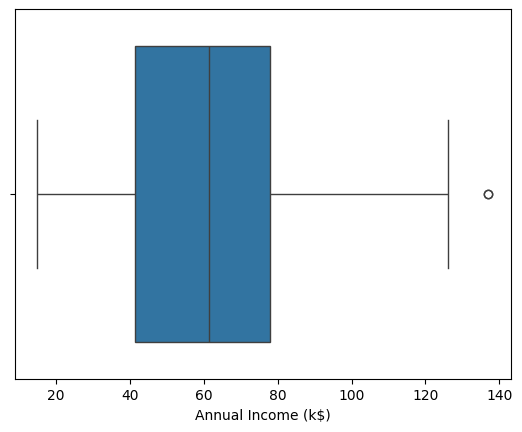

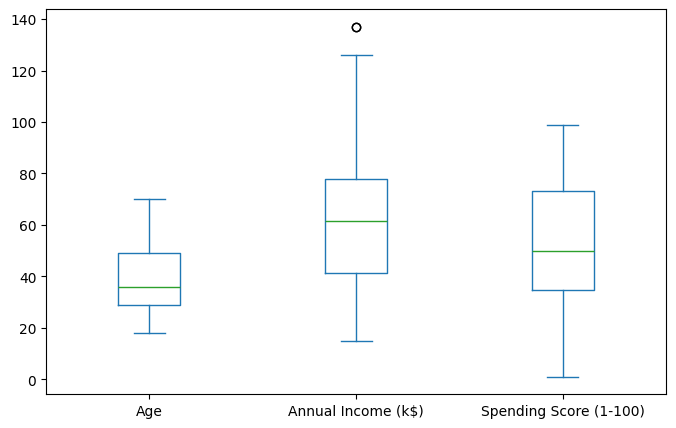

In [82]:

# Single column
sns.boxplot(x=df_encoded['Annual Income (k$)'])
plt.show()
# Multiple columns
df_encoded[['Age','Annual Income (k$)','Spending Score (1-100)']].plot(kind='box', figsize=(8,5))
plt.show()


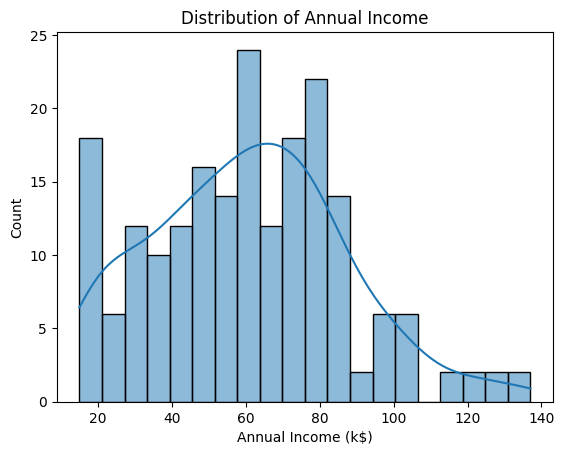

In [83]:
sns.histplot(df_encoded['Annual Income (k$)'], kde=True, bins=20)
plt.title('Distribution of Annual Income')
plt.show()

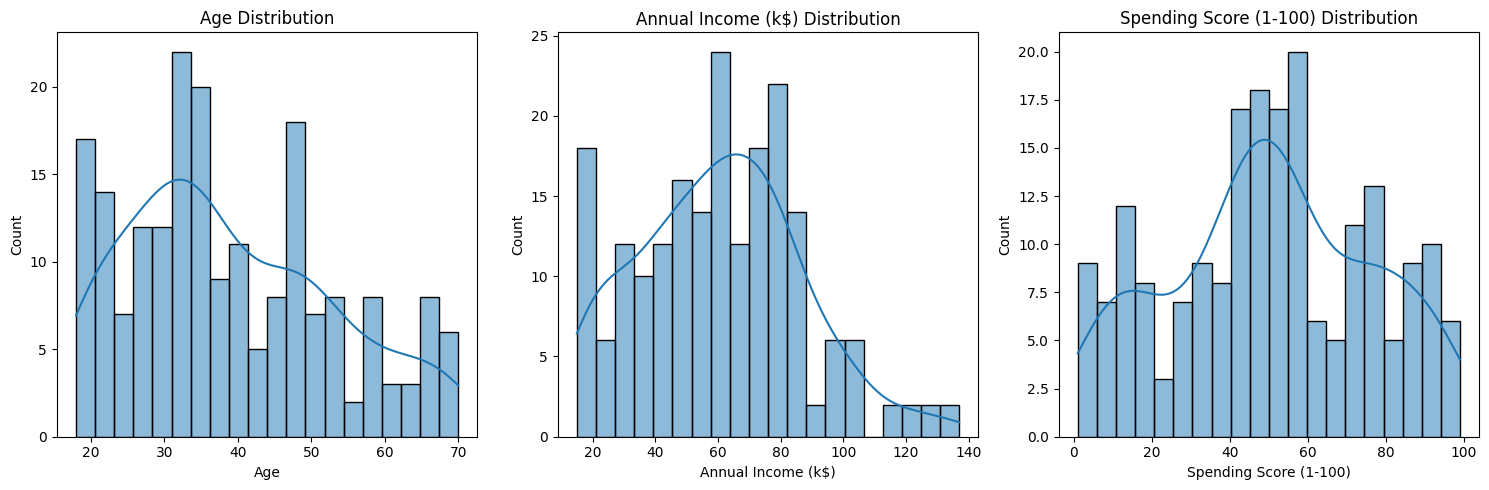

In [84]:
numeric_cols = ['Age','Annual Income (k$)','Spending Score (1-100)']

plt.figure(figsize=(15,5))
for i, col in enumerate(numeric_cols):
    plt.subplot(1, 3, i+1)
    sns.histplot(df[col], kde=True, bins=20)
    plt.title(f'{col} Distribution')
plt.tight_layout()
plt.show()


In [85]:
Q1=df_encoded['Annual Income (k$)'].quantile(0.25)
Q3=df_encoded['Annual Income (k$)'].quantile(0.75)
IQR=Q3-Q1
lower_bond = Q1-1.5*IQR
Upper_bond = Q3+1.5*IQR

outliers=df_encoded[(df_encoded['Annual Income (k$)']<lower_bond)| (df_encoded['Annual Income (k$)']>Upper_bond)]
print(outliers)

     Age  Annual Income (k$)  Spending Score (1-100)  Gender_Male
198   32                 137                      18          1.0
199   30                 137                      83          1.0


In [93]:
# df_encoded['Annual Income (k$)'] = df_encoded['Annual Income (k$)'].clip(lower_bound, upper_bound)

#Limit the income to the upper bound:
df_encoded['Annual Income (k$)'] = df_encoded['Annual Income (k$)'].clip(upper=Upper_bond)  # upper bound from IQR



In [97]:
print(df_encoded[['Age','Annual Income (k$)','Spending Score (1-100)','Gender_Male']].skew())



Age                       0.485569
Annual Income (k$)        0.291249
Spending Score (1-100)   -0.047220
Gender_Male               0.243578
dtype: float64


In [88]:
# | Column                 | Skew  | Interpretation                          |
# | ---------------------- | ----- | --------------------------------------- |
# | Age                    | 0.49  | Slightly right-skewed, almost symmetric |
# | Annual Income (k$)     | 0.32  | Slightly right-skewed, minor skew       |
# | Spending Score (1-100) | -0.05 | Almost symmetric                        |
# | Gender_Male            | 0.24  | Almost symmetric / binary column        |

*Observation:*

#Values between -0.5 and 0.5 are generally considered approximately symmetric.

- Almost all columns are approximately symmetric.  
- No extreme skewness or significant outliers are present.  
- Therefore, we can proceed to K-Means clustering without transforming or capping numeric features.


In [95]:
df_encoded.describe()

,Age,Annual Income (k$),Spending Score (1-100),Gender_Male
count,200.000000,200.000000,200.000000,200.000000
mean,38.850000,60.517500,50.200000,0.440000
std,13.969007,26.143551,25.823522,0.497633
min,18.000000,15.000000,1.000000,0.000000
25%,28.750000,41.500000,34.750000,0.000000
50%,36.000000,61.500000,50.000000,0.000000
75%,49.000000,78.000000,73.000000,1.000000
max,70.000000,132.750000,99.000000,1.000000


count    200.000000
mean      60.517500
std       26.143551
min       15.000000
25%       41.500000
50%       61.500000
75%       78.000000
max      132.750000
Name: Annual Income (k$), dtype: float64


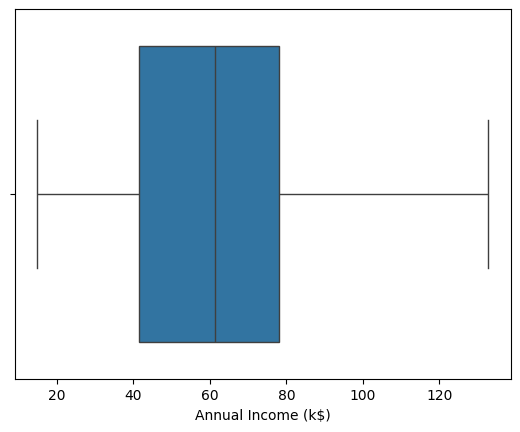

In [96]:
print(df_encoded['Annual Income (k$)'].describe())
sns.boxplot(x=df_encoded['Annual Income (k$)'])
plt.show()


Observation

After applying IQR-based outlier capping, the maximum Annual Income was reduced from extreme values to 132.75, keeping all other values intact.

The distribution of incomes is now more balanced, with no extreme outliers that could distort clustering.

The mean income is 60.52, and the standard deviation is 26.14, indicating a moderate spread in customer incomes.

Percentiles (Q1 = 41.5, Median = 61.5, Q3 = 78) show that the majority of customer incomes lie within a reasonable range.



In [ ]:
#Standarization
from sklearn.preprocessing import StandardScaler
Standard_scaler=StandardScaler()
scaled_data=Standard_scaler.fit_transform(df_encoded)
print(scaled_data)

[[-1.42456879 -1.74542941 -0.43480148  1.12815215]
 [-1.28103541 -1.74542941  1.19570407  1.12815215]
 [-1.3528021  -1.70708307 -1.71591298 -0.88640526]
 [-1.13750203 -1.70708307  1.04041783 -0.88640526]
 [-0.56336851 -1.66873673 -0.39597992 -0.88640526]
 [-1.20926872 -1.66873673  1.00159627 -0.88640526]
 [-0.27630176 -1.6303904  -1.71591298 -0.88640526]
 [-1.13750203 -1.6303904   1.70038436 -0.88640526]
 [ 1.80493225 -1.59204406 -1.83237767  1.12815215]
 [-0.6351352  -1.59204406  0.84631002 -0.88640526]
 [ 2.02023231 -1.59204406 -1.4053405   1.12815215]
 [-0.27630176 -1.59204406  1.89449216 -0.88640526]
 [ 1.37433211 -1.55369772 -1.36651894 -0.88640526]
 [-1.06573534 -1.55369772  1.04041783 -0.88640526]
 [-0.13276838 -1.55369772 -1.44416206  1.12815215]
 [-1.20926872 -1.55369772  1.11806095  1.12815215]
 [-0.27630176 -1.51535138 -0.59008772 -0.88640526]
 [-1.3528021  -1.51535138  0.61338066  1.12815215]
 [ 0.94373197 -1.43865871 -0.82301709  1.12815215]
 [-0.27630176 -1.43865871  1.85

In [101]:
#scaled_data is a NumPy array,Convert them into DataFrame

scaled_df = pd.DataFrame(scaled_data, columns=df_encoded.columns)
print(scaled_df.head())


        Age  Annual Income (k$)  Spending Score (1-100)  Gender_Male
0 -1.424569           -1.745429               -0.434801     1.128152
1 -1.281035           -1.745429                1.195704     1.128152
2 -1.352802           -1.707083               -1.715913    -0.886405
3 -1.137502           -1.707083                1.040418    -0.886405
4 -0.563369           -1.668737               -0.395980    -0.886405


In [103]:
#Normalization
from sklearn.preprocessing import MinMaxScaler
Nomral_scaler= MinMaxScaler()
normalized_data =Nomral_scaler.fit_transform(scaled_df)
print(normalized_data)


[[0.01923077 0.         0.3877551  1.        ]
 [0.05769231 0.         0.81632653 1.        ]
 [0.03846154 0.00849257 0.05102041 0.        ]
 [0.09615385 0.00849257 0.7755102  0.        ]
 [0.25       0.01698514 0.39795918 0.        ]
 [0.07692308 0.01698514 0.76530612 0.        ]
 [0.32692308 0.02547771 0.05102041 0.        ]
 [0.09615385 0.02547771 0.94897959 0.        ]
 [0.88461538 0.03397028 0.02040816 1.        ]
 [0.23076923 0.03397028 0.7244898  0.        ]
 [0.94230769 0.03397028 0.13265306 1.        ]
 [0.32692308 0.03397028 1.         0.        ]
 [0.76923077 0.04246285 0.14285714 0.        ]
 [0.11538462 0.04246285 0.7755102  0.        ]
 [0.36538462 0.04246285 0.12244898 1.        ]
 [0.07692308 0.04246285 0.79591837 1.        ]
 [0.32692308 0.05095541 0.34693878 0.        ]
 [0.03846154 0.05095541 0.66326531 1.        ]
 [0.65384615 0.06794055 0.28571429 1.        ]
 [0.32692308 0.06794055 0.98979592 0.        ]
 [0.32692308 0.07643312 0.34693878 1.        ]
 [0.13461538 

In [105]:
#Convert Normalized array data to DataFrame

normalized_df=pd.DataFrame(normalized_data,columns=scaled_df.columns)
print(normalized_df)

          Age  Annual Income (k$)  Spending Score (1-100)  Gender_Male
0    0.019231            0.000000                0.387755          1.0
1    0.057692            0.000000                0.816327          1.0
2    0.038462            0.008493                0.051020          0.0
3    0.096154            0.008493                0.775510          0.0
4    0.250000            0.016985                0.397959          0.0
..        ...                 ...                     ...          ...
195  0.326923            0.891720                0.795918          0.0
196  0.519231            0.942675                0.275510          0.0
197  0.269231            0.942675                0.744898          1.0
198  0.269231            1.000000                0.173469          1.0
199  0.230769            1.000000                0.836735          1.0

[200 rows x 4 columns]


# KMeans Clustering Modeling

In [113]:
from sklearn.cluster import KMeans

In [130]:
normalized_df.columns

Index(['Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Gender_Male',
       'Cluster'],
      dtype='object')

### 1. Elbow Method

In [ ]:
X=normalized_df[numeric_cols] # All the numeric columns

print(X.head())


wcss=[] # WCSS--> Within Cluster sum of squares

for k in range(1,10): #testing 1 to 10 clusters
    K_means =KMeans(n_clusters=k,init='k-means++',random_state=42)
    K_means.fit(X)
    wcss.append(K_means.inertia_) # here inertia gives wcss
print("WCSS values:",wcss)

        Age  Annual Income (k$)  Spending Score (1-100)
0  0.019231            0.000000                0.387755
1  0.057692            0.000000                0.816327
2  0.038462            0.008493                0.051020
3  0.096154            0.008493                0.775510
4  0.250000            0.016985                0.397959
WCSS values: [37.9881431553264, 23.147433903010267, 18.10175967529315, 15.209636680768117, 10.573741574356589, 8.505728815994575, 7.62225104896988, 6.348303543686228, 5.573079132137854]


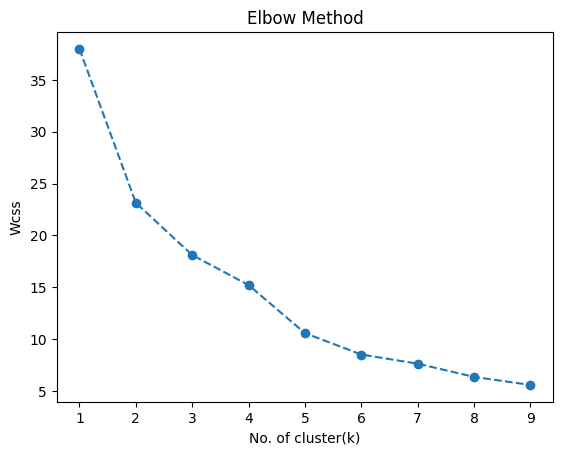

In [120]:
plt.Figure(figsize=(10,6))
plt.plot(range(1,10),wcss,marker='o',linestyle='--')
plt.title("Elbow Method")
plt.xlabel("No. of cluster(k)")
plt.ylabel('Wcss')
plt.xticks(range(1,10))
plt.show()

Observation: Elbow Method

The Elbow Method was used to determine the optimal number of clusters for K-Means clustering.

We plotted WCSS (Within-Cluster Sum of Squares) against different values of k (number of clusters).

The plot shows a sharp decrease in WCSS up to k = 5, after which the rate of decrease slows down.

This point, where the curve starts to flatten, is called the “elbow”.

Therefore, k = 5 is chosen as the optimal number of clusters for our dataset.

### 2. K-Means with the Optimal k

In [ ]:
X=normalized_df[numeric_cols] # All the numeric columns

optimal_k = 5
K_means = KMeans(n_clusters=5,init='k-means++',random_state=42)
K_means.fit(X)

normalized_df['Cluster'] = K_means.labels_ # Add cluster labels to DataFrame


        Age  Annual Income (k$)  Spending Score (1-100)  Gender_Male  Cluster
0  0.019231            0.000000                0.387755          1.0        4
1  0.057692            0.000000                0.816327          1.0        4
2  0.038462            0.008493                0.051020          0.0        2
3  0.096154            0.008493                0.775510          0.0        4
4  0.250000            0.016985                0.397959          0.0        4


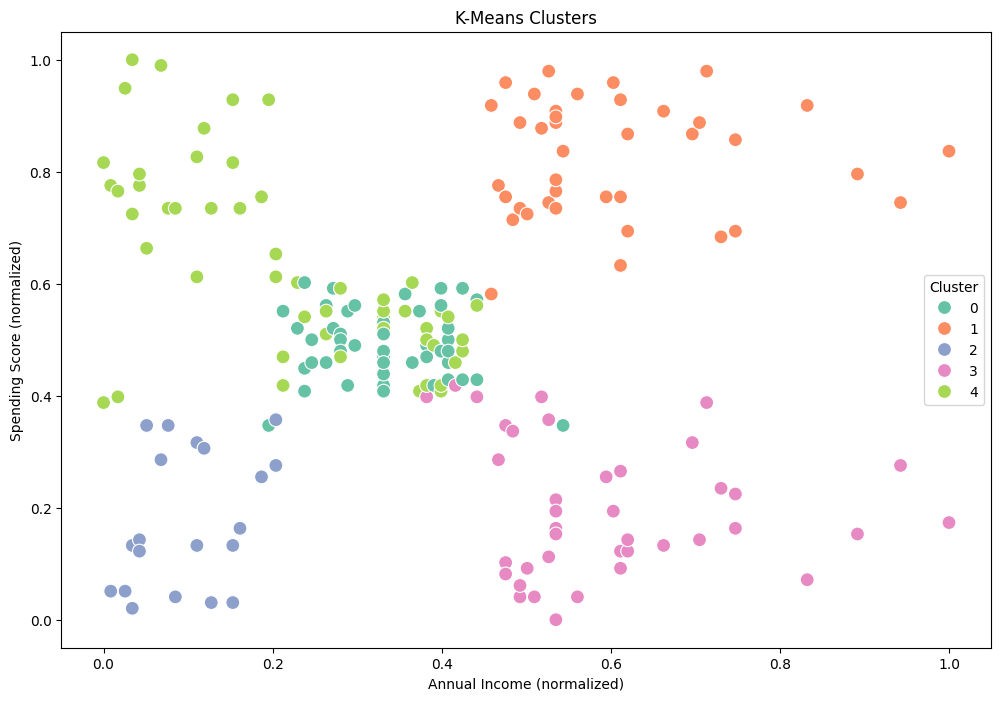

In [135]:
plt.figure(figsize=(12,8))
sns.scatterplot(data=normalized_df, x='Annual Income (k$)',y='Spending Score (1-100)',hue='Cluster',palette='Set2',s=100)
plt.title('K-Means Clusters')
plt.xlabel('Annual Income (normalized)')
plt.ylabel('Spending Score (normalized)')
plt.legend(title='Cluster')
plt.show()

In [129]:
normalized_df.groupby('Cluster')[numeric_cols].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Cluster,,,
0,0.730351,0.333426,0.490240
1,0.286058,0.602919,0.821684
2,0.543269,0.099788,0.177041
3,0.420673,0.597399,0.192602
4,0.138177,0.221593,0.624906


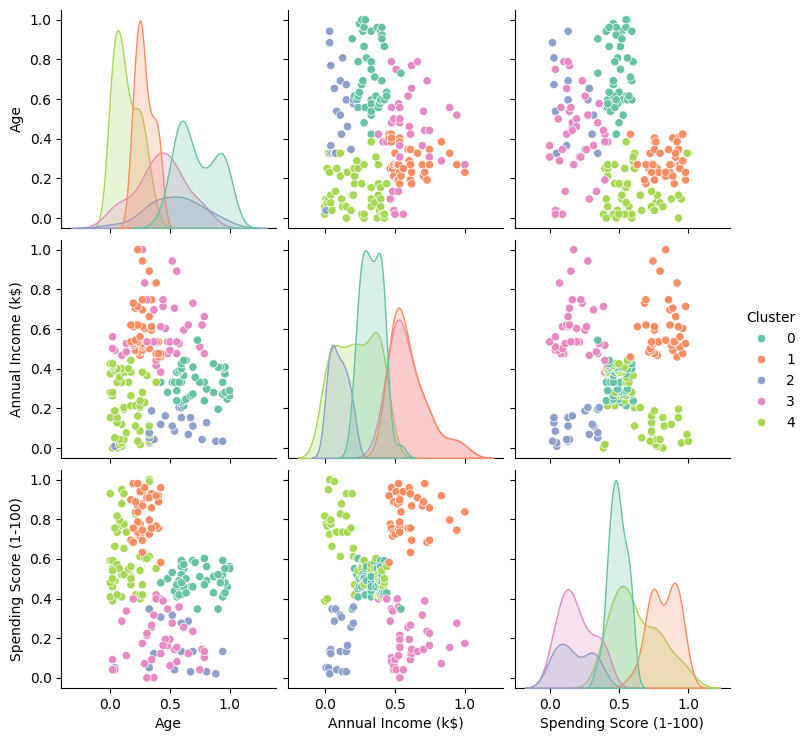

In [137]:
sns.pairplot(normalized_df, vars=numeric_cols, hue='Cluster', palette='Set2')
plt.show()


## Cluster Observation (Based on  Output)

### Cluster 0 — Older age, low income, mid-level spenders

Age: High

Income: Low

Spending: Medium
Interpretation:
These are older customers with limited income but moderate spending. They may be loyal or necessity-driven buyers.



### Cluster 1 — Young, high income, very high spenders (Premium customers)

Age: Low

Income: High

Spending: Very High
Interpretation:
These are ideal premium customers — high purchasing power and high spending behaviour.
Perfect for targeted marketing.

### Cluster 2 — Older, very low income, very low spending

Age: High
Income: Very Low
Spending: Very Low
Interpretation:
These are budget-restricted customers. They may not be a profitable segment.

### Cluster 3 — Middle-aged, high income, very low spending

Age: Medium
Income: High
Spending: Low
Interpretation:
These are high-income conservative shoppers — they have money but don’t spend much.
You can target them with offers, loyalty schemes, or promotions.

### Cluster 4 — Very young, low income, high spending

Age: Very Low
Income: Low
Spending: High
Interpretation:
These are youth impulse buyers — low income but spend a lot.
Useful for marketing small, trendy, low-cost products.

📌 Summary in One Line


2 high-spending clusters (1 & 4)

2 low-spending clusters (2 & 3)

1 intermediate cluster (0)

Cluster 1 is the most profitable segment.